In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [143]:
df = pd.read_csv("Car details v3.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [13]:
df[df.isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df = df.dropna(how='any')

In [145]:
display(df.shape, df.isnull().sum())

(7906, 13)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 889.0+ KB


### Primeros pasos de preprocessing
* Para la variable 'name' deberiamos utilizar solo la primera palabra, que es la que denota la "Marca" del auto y considerarla como nueva variable en una columna llamada "Marca" y otra con el modelo "Model".
* Verificar con cada una de las columnas con "Mising values" si estas tienen alguna correlacion importante con "Selling_Price" para utilizarlas como posibles variables, de no ser asi eliminar las que no tengan una correlacion importante, (Ademas de verificar si entre estas hay una correlacion mayor al 0.8 y eliminar una de ellas para evitar problemas de "cruce")
* Suplantar la columna "Year" por una que especifique la antiguedad del vehiculo, es decir, Year-datetime.now.year.
* Torque, evaluar dos posibilidades, utilizar las variables de Newton-meter(Nm) o RPM,__(1 newton metro ≈ 0.102 kilogramo metro.)__ para el caso de RPM no habria que hacer conversiones, pero Nm si. Aunque la relacion entre Nm y RPM resulta en Potencia/HP.
> Considerancion: En el caso de los B.H.P. se tiene en cuenta la pérdida de potencia provocada por la fricción, aspecto que no se tiene en cuenta a la hora de medir la potencia utilizando la unidad de medida H.P.
* Limpiar los valores de las columnas elimnando su variable y solo utilizar el valor numerico
* _\d+Nm(?=@)_ formula Regex para extraccion de numero en Newton-meter
* _\d+\.*\d(?=@)(?<!kgm)_ formula Regex para extraccion de numero para casos de Kgm

In [140]:
# Para splits cuya longitud es igual a 4 el orden de las variables es irregular, por eso solo tomaremos el ultimo valor para estos casos
#y procederemos a eliminar las filas de los valores errados
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4}
rpm = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
display(len(rpm), rpm)

7906

['2000rpm',
 '1500-2500rpm',
 '2,700(kgm@',
 '1750-2750rpm',
 '4,500(kgm@',
 '4000rpm',
 '4,500(kgm@',
 '2500rpm',
 '1800-2400rpm',
 '2000rpm',
 '2250rpm',
 '4500rpm',
 '2000rpm',
 '3500rpm',
 '3500-3600rpm',
 '1750rpm',
 '1750-2750rpm',
 '3000rpm',
 '1500-2750rpm',
 '2000rpm',
 '1750rpm',
 '2000rpm',
 '1750rpm',
 '3500rpm',
 '4000rpm',
 '3500rpm',
 '1750rpm',
 '3500rpm',
 '2500rpm',
 '1750rpm',
 '3000rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '3500rpm',
 '4850rpm',
 '4000rpm',
 '1700-2700rpm',
 '2500rpm',
 '1750-2500rpm',
 '4600rpm',
 '4800rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '1400-3400rpm',
 '1400-3400rpm',
 '1250-4000rpm',
 '1750rpm',
 '2000-2500rpm',
 '1750rpm',
 '4400rpm',
 '1750rpm',
 '1200-3400rpm',
 '1200-3600rpm',
 '1750-2500rpm',
 '4000rpm',
 '1750-3000rpm',
 '1400-2800rpm',
 '1750-3000rpm',
 '4000rpm',
 '1500-2750rpm',
 '2000rpm',
 '4000rpm',
 '4000rpm',
 '1500-3000rpm',
 '1750rpm',
 '3500rpm',
 '1500-3000rpm',
 '1750rpm',
 '1750rpm',
 '4000rpm',
 '2000rpm',
 '1400-340

In [291]:
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4} # de acuerdo a la longitud de x hara un mapping para saber en que celda se encuentra el rpm
df['rpm'] = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,"2,700(kgm@"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,"4,500(kgm@"


In [293]:
df['rpm'].replace({'\,': '',
                   'rpm':'',
                   '\(kgm@':'',
                   '\-':' ',
                   '\~':' ',
                   '\+/-':' ',
                   '\+/':' ',
                   '400Nm': '4000',
                  '\(NM@': ''}, regex=True, inplace=True)

In [294]:
df = df.drop(index=df[(df.rpm =='')].index, axis='index')
df = df.drop(index=df[(df.rpm =='/')].index, axis='index')
df = df.drop(index=df[(df.rpm =='480Nm')].index, axis='index')

In [269]:
def division_rpm(valor):
    if len(valor.split(' ')) == 3:
        a, b, c = valor.split(' ')
        resultado = (int(a)+int(c))/2
    elif len(valor.split(' ')) == 2:
        a, b = valor.split(' ')
        resultado = (int(a)+int(b))/2
    else:
        resultado = int(valor)        
    return resultado

In [296]:
df['rpm'] = df['rpm'].apply(division_rpm)

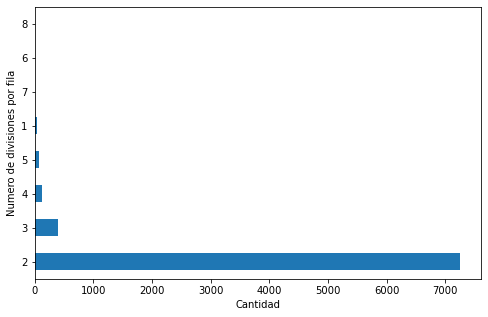

In [68]:
%matplotlib inline
spliting = [len(x) for x in df['torque'].str.split(' ')]

figure= plt.figure(figsize=(8,5))
pd.Series(spliting).value_counts().plot(kind='barh')
plt.ylabel('Numero de divisiones por fila')
plt.xlabel('Cantidad')

plt.show()

In [395]:
Nm_test = pd.Series([x[0] for x in df['torque'].str.split(' ')])
display('Nm@' in Nm_test[0], Nm_test[0].endswith('m@'), Nm_test[:10])

True

True

0       190Nm@
1       250Nm@
2        12.7@
3         22.4
4        11.5@
5    113.75nm@
6         7.8@
7        59Nm@
8       170Nm@
9       160Nm@
dtype: object

In [441]:
def clean_nm(valor):
    if 'kgm' in valor:
        resultado = float(re.findall(r'\d+\.*\d+(?=kgm)', valor)[0])/0.102 # Conversion de Kgm a Nm
        #El resultado del re.findall es del tipo list, por ello extraemos el item con [0]
    elif valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = re.findall('\d+\.*\d+(?=Nm@)',valor, flags=re.IGNORECASE)
    
    else:
        resultado = float(re.findall(r'\d+\.*\d+', valor)[0])/0.102
    return resultado    

In [481]:
def clean_nm_2(valor):
    if valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = re.findall('(\d+\.*\d+)(?=Nm)',valor, flags=re.IGNORECASE)
    else:
        resultado = list(map(float, re.findall(r'\d+\.*\d+', valor)))/np.array(0.102)
    return resultado

In [ ]:
('Nm@', 'nm@','NM@', 'Nm')

In [345]:
Nm_test.str.extract('(\d+\.*\d+)(?=Nm@)', flags=re.IGNORECASE )

,0
0,190
1,250
2,NaN
3,NaN
4,NaN
...,...
7853,113.7
7854,NaN
7855,190
7856,140


In [378]:
list(map(float, re.findall('(\d+\.*\d+)(?=Nm@)', Nm_test[5], flags=re.IGNORECASE)))

[113.75]

In [443]:
float(re.findall('(\d+\.*\d+)', Nm_test[6])[0])

7.8

In [432]:
Nm_test[Nm_test.str.contains(r'\d+\.*\d+',regex=True)]

0         190Nm@
1         250Nm@
2          12.7@
3           22.4
4          11.5@
          ...   
7853    113.7Nm@
7854         24@
7855      190Nm@
7856      140Nm@
7857      140Nm@
Length: 7857, dtype: object

In [480]:
Nm_test[Nm_test.str.contains(r'(\d+\.*\d+)(?=Nm)', flags= re.IGNORECASE, regex=True)].shape

(7248,)

In [466]:
Nm_test.apply(clean_nm_2)

0                      [190]
1                      [250]
2       [124.50980392156863]
3        [219.6078431372549]
4       [112.74509803921569]
                ...         
7853                 [113.7]
7854    [235.29411764705884]
7855                   [190]
7856                   [140]
7857                   [140]
Length: 7858, dtype: object